In [18]:
import numpy as np
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
# model arma: 
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller


In [7]:
# useful functions: 


def sort_dates(date_list):
    # Convertir les chaînes de date en objets datetime
    date_objects = [datetime.strptime(date, '%m/%d/%Y %I:%M:%S %p') for date in date_list]
    
    # Trier les objets datetime
    sorted_dates = sorted(date_objects)
    
    # Convertir les objets datetime triés en chaînes de date
    sorted_date_strings = [date.strftime('%m/%d/%Y %I:%M:%S %p') for date in sorted_dates]
    
    return sorted_date_strings

In [8]:
def liste_of_dates_to_number_of_crime(listetriee): 

    dico=dict()
    for dmadate in listetriee: 
        dico[str(dmadate.date())]=0
    for dmadate in listetriee:
        dico[str(dmadate.date())]+=1
    dates_crime2=list(dico.keys())
    nombre_crimes2=list(dico.values())
    return dates_crime2, nombre_crimes2


In [9]:
df=pd.read_csv('./data/crimes.csv')
maliste=df['DATE OCC'].tolist()
maliste.sort()
dated=pd.to_datetime(maliste)


In [10]:
dates, nombre = liste_of_dates_to_number_of_crime(dated)

Crimes on vehicules

In [12]:

df=pd.read_csv('./data/crimes.csv')
maliste=df['DATE OCC'].tolist()
maliste.sort()

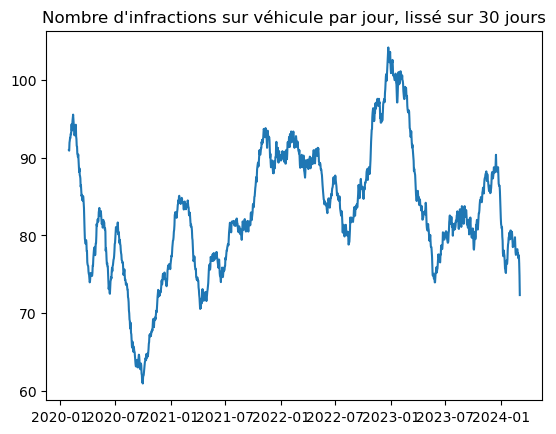

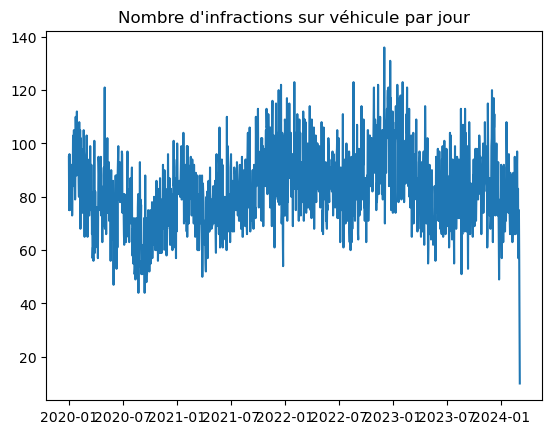

In [13]:
# focusing on vehile crimes

df2=df[df['Crm Cd Desc'].str.contains(' VEHICLE')]
df2_bis= df2[['DATE OCC', 'AREA NAME']]
df2bis = df2_bis
liste2=df2bis['DATE OCC'].tolist()
liste2.sort()

liste_triee2=sort_dates(liste2)

dico2=dict()
for date in liste_triee2: 
    dico2[date[:10]]=0
for date in liste_triee2:
    dico2[date[:10]]+=1

    dates_crime2=list(dico2.keys())
nombre_crimes2=list(dico2.values())
#dates crome to datetime:
dates_crime2=[datetime.strptime(date, '%m/%d/%Y') for date in dates_crime2]
%matplotlib inline
#lissage de nombre_crimes2
plt.plot(dates_crime2 , pd.Series(nombre_crimes2).rolling(window=30).mean())
plt.title("Nombre d'infractions sur véhicule par jour, lissé sur 30 jours")
plt.show()
plt.plot(dates_crime2, nombre_crimes2)
plt.title("Nombre d'infractions sur véhicule par jour")
plt.show()


In [14]:
# remove nan from nombre_crimes2
dates_crime2=dates_crime2[29:]
nombre_crimes2=nombre_crimes2[29:]


In [42]:
# Build Model
imin=0
jmin=0
kmin=0
min=10000
dico_results=dict()
for i in range(10): 
    for j in range(10): 
        for k in range(10): 
            if not ((i==2) and (j==2) and (k==2)) and not ((i==0) and (j==1) and (k==0)):
                print('test avec ' + str(i) + str(j) + str(k))
                
                train=nombre_crimes2
                model = ARIMA(train, order=(i,j,k))  
                fitted = model.fit()  

                prediction=fitted.predict(start=0, end=len(train) , typ='levels')

                # Plot
                # plt.figure(figsize=(12,5), dpi=100)
                # plt.plot(train, label='training')
                # plt.plot(prediction, label='forecast')
                # plt.title('Forecast vs real data' + str(i) + str(j) + str(k))
                # plt.legend(loc='upper left', fontsize=8)
                # plt.show()
                loss=abs(prediction[1:]-train).mean()
                dico_results[str(i)+str(j)+str(k)]=loss
                if loss < min: 
                    print('nouveau min: ')
                    min=loss
                    imin=i
                    jmin=j
                    kmin=k 
                    print(min, imin, jmin, kmin)


test avec 000


c:\Users\grego\Miniconda3\envs\env_qcm\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


nouveau min: 
11.183555172260824 0 0 0
test avec 001
nouveau min: 
7.90094134112354 0 0 1
test avec 002
nouveau min: 
7.110179774627249 0 0 2
test avec 003
nouveau min: 
6.865844233061153 0 0 3
test avec 004
nouveau min: 
6.726573764198353 0 0 4
test avec 005
nouveau min: 
6.6876530134403 0 0 5
test avec 006
test avec 007
test avec 008
test avec 009
test avec 011
test avec 012
test avec 013
test avec 014
test avec 015
test avec 016
test avec 017
test avec 018
test avec 019
test avec 020
test avec 021
nouveau min: 
0.09317470373242133 0 2 1
test avec 022


c:\Users\grego\Miniconda3\envs\env_qcm\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


test avec 023
test avec 024
test avec 025
test avec 026


c:\Users\grego\Miniconda3\envs\env_qcm\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


test avec 027
test avec 028


c:\Users\grego\Miniconda3\envs\env_qcm\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


test avec 029


c:\Users\grego\Miniconda3\envs\env_qcm\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


test avec 030
test avec 031
test avec 032
test avec 033
test avec 034


c:\Users\grego\Miniconda3\envs\env_qcm\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


test avec 035


c:\Users\grego\Miniconda3\envs\env_qcm\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


test avec 036


c:\Users\grego\Miniconda3\envs\env_qcm\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


test avec 037
test avec 038
test avec 039
test avec 040
test avec 041
test avec 042
test avec 043
test avec 044


KeyboardInterrupt: 

In [41]:
print(imin, jmin, kmin)

0 2 1


In [39]:
dico_results

{'000': 11.183555172260824,
 '001': 7.90094134112354,
 '002': 7.110179774627249,
 '003': 6.865844233061153,
 '011': 8.57591074177282,
 '012': 7.268246555238673,
 '013': 7.224494167084322,
 '020': 11.844929380941215,
 '021': 0.09317470373242133,
 '022': 8.561695623453545,
 '023': 7.249405946318233,
 '030': 30.189135143907293,
 '031': 11.948874396830803,
 '032': 0.5150653675100965,
 '033': 8.487164015108995,
 '100': 6.181741368095326,
 '101': 8.556999683770648,
 '102': 7.300428839907892,
 '103': 7.261082472896184,
 '110': 4.701182383667438,
 '111': 7.240933092366906,
 '112': 7.238335996830027,
 '113': 7.218336742216882,
 '120': 6.975113616529347,
 '121': 4.717539160122267,
 '122': 7.225356657062772,
 '123': 8.553611881671184,
 '130': 17.985377607547115,
 '131': 7.069636095108166,
 '132': 4.773605960514143,
 '133': 7.16141552080809,
 '200': 6.42944677362915,
 '201': 7.274350377964867,
 '202': 7.274322455308083,
 '203': 7.285338507234208,
 '210': 5.569243837216484,
 '211': 7.24784859518996

In [333]:
datas=pd.read_csv('./data/crimes.csv')


In [336]:
maliste2=datas['DATE OCC'].tolist()
maliste2.sort()
datessd=pd.to_datetime(maliste2)
dates2, nombre2 = liste_of_dates_to_number_of_crime(datessd)
dates2 = [datetime.strptime(date, '%Y-%m-%d') for date in dates2]


In [353]:
dates2.sort()

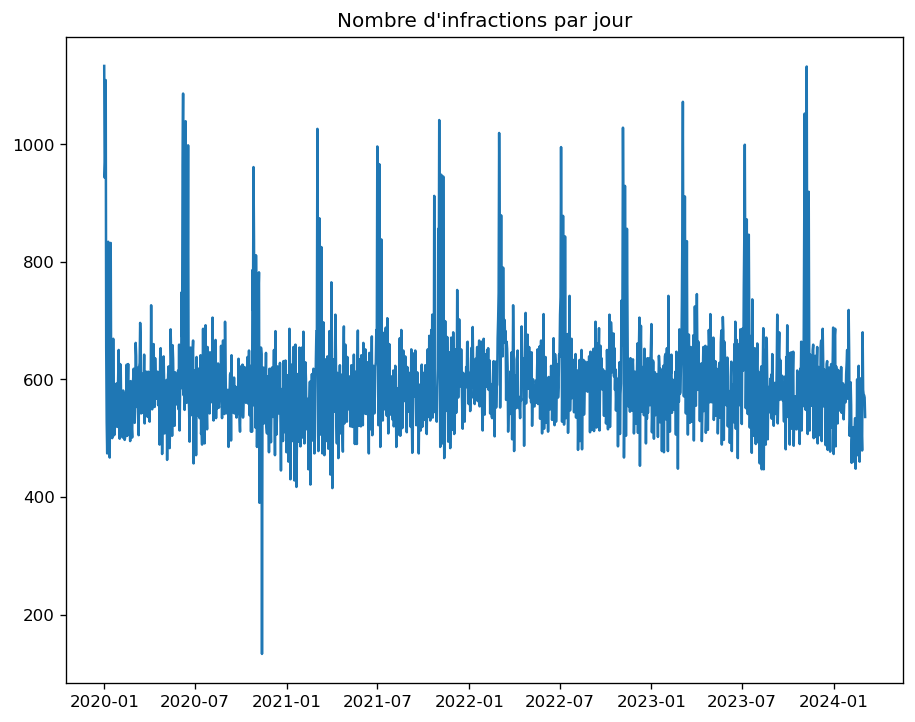

In [355]:
plt.plot(dates2, nombre2)
plt.title("Nombre d'infractions par jour")
plt.show()

In [3]:
df=pd.read_csv('./data/crimes.csv')


In [7]:
# create a df for each AREA NAME
dicodf=dict()
for elt in list(set(df['AREA NAME'])): 
    dicodf[elt]=df[df['AREA NAME'].str.contains(elt)]
    


In [61]:
my_df_rolled=pd.DataFrame()
for elt in dicodf: 
    print(elt)
    df2=dicodf[elt]
    

    liste2=df2['DATE OCC'].tolist()
    liste2.sort()

    liste_triee2=sort_dates(liste2)


    dico2=dict()
    for date in liste_triee2: 
        dico2[date[:10]]=0
    for date in liste_triee2:
        dico2[date[:10]]+=1

    dates_crime2=list(dico2.keys())
    nombre_crimes2=list(dico2.values())
    dates_crime2=[datetime.strptime(date, '%m/%d/%Y') for date in dates_crime2]
    nombrecrimesrolled=pd.Series(nombre_crimes2).rolling(window=30).mean()[30:]
    if elt !='Pacific': 
        my_df_rolled[elt]=nombrecrimesrolled


Southeast
Rampart
Central
Newton
Hollywood
Pacific
Mission
Foothill
Northeast
West LA
Devonshire
Wilshire
Harbor
West Valley
Topanga
Van Nuys
N Hollywood
Olympic
77th Street
Hollenbeck
Southwest


In [75]:
# change name of row with the dates: 
my_df_rolled['dates']=dates_crime2[30:]
# set dates as the columns
my_df_rolled=my_df_rolled.set_index('dates')


In [76]:
my_df_rolled.to_csv('./data/nombre_de_crimes_par_région_rolled.csv')

In [3]:
data_rolled=pd.read_csv('./data/nombre_de_crimes_par_région_rolled.csv')
data=pd.read_csv('./data/nombre_de_crimes_par_région.csv')

C:\Users\grego\AppData\Local\Temp\ipykernel_11760\191158072.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=data.corr()


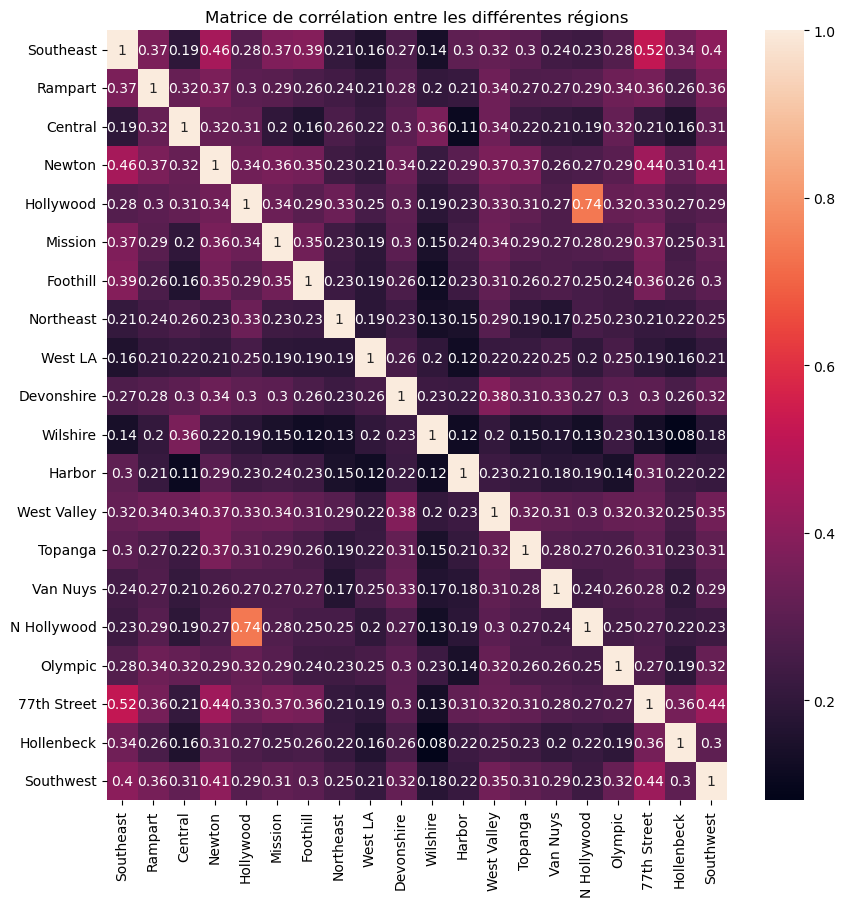

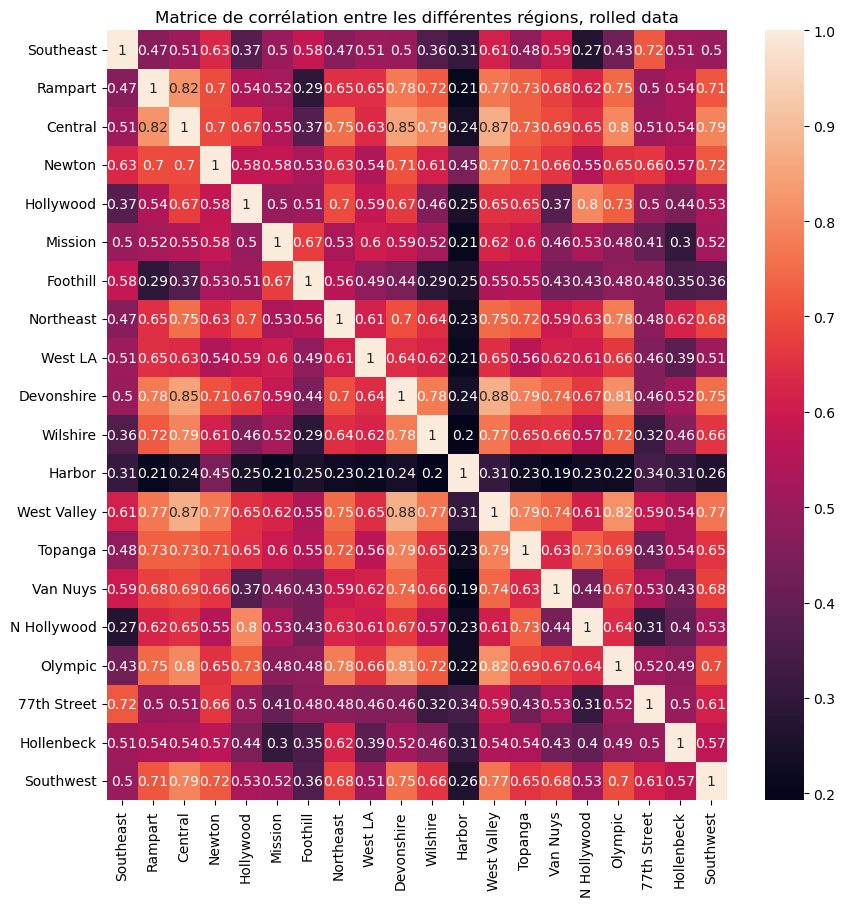

In [5]:
# matrice de corrélation
correlation_matrix=data.corr()
# heatmap
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True)
plt.title("Matrice de corrélation entre les différentes régions")
plt.show()
# with rolled data: 
data_sans_dates_rolled=data_rolled.drop(columns=['dates'])
# matrice de corrélation
correlation_matrix_rolled=data_sans_dates_rolled.corr()
# heatmap
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix_rolled, annot=True)
plt.title("Matrice de corrélation entre les différentes régions, rolled data")
plt.show()


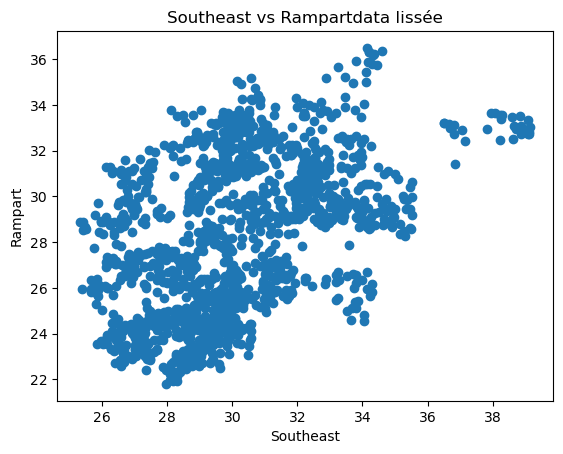

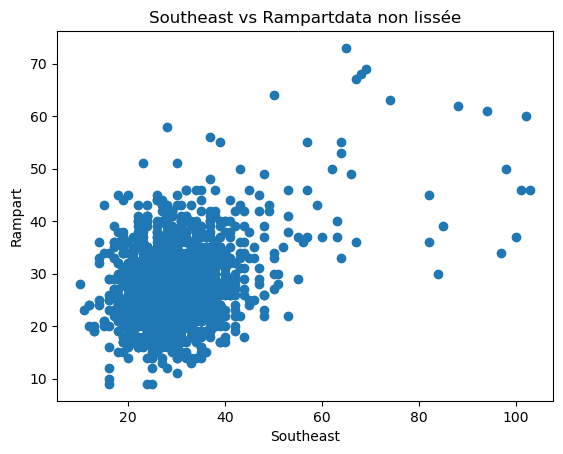

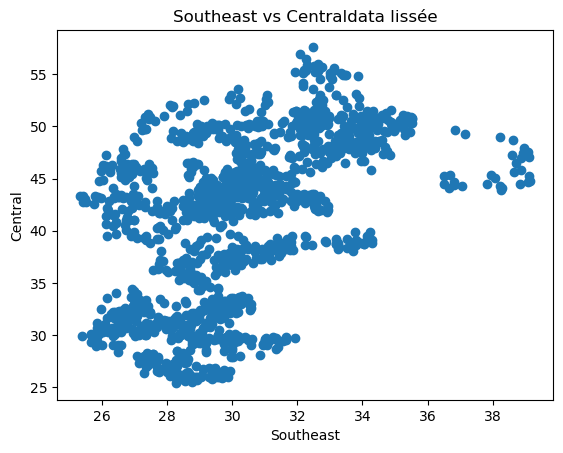

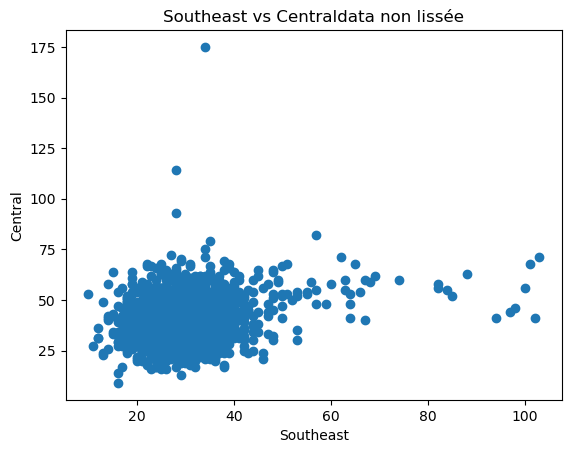

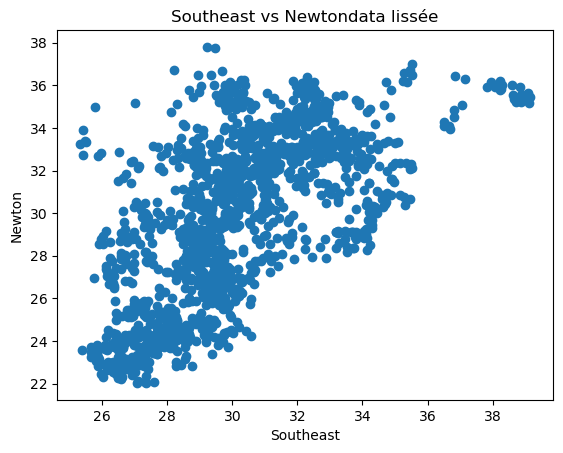

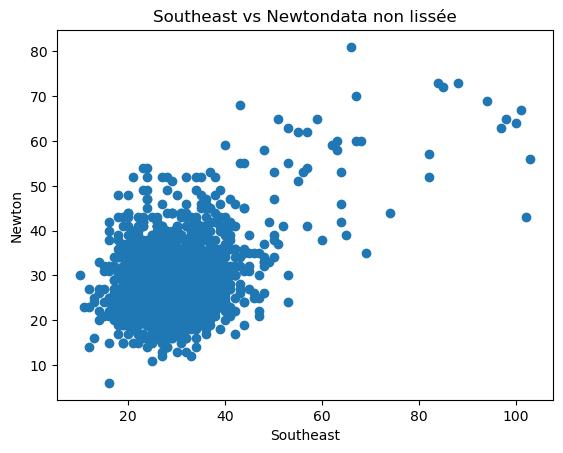

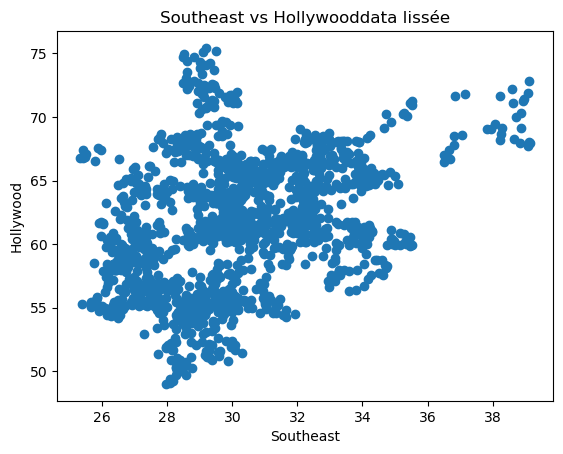

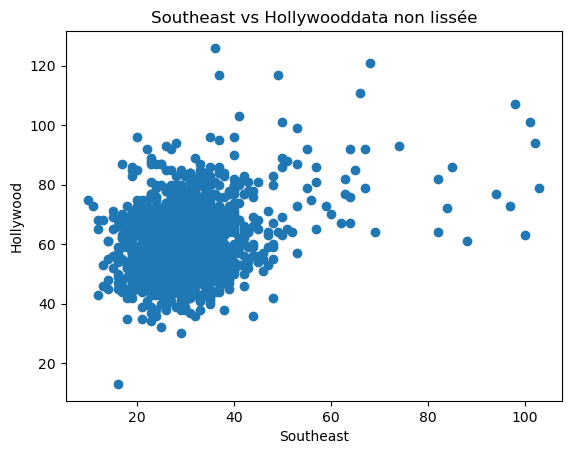

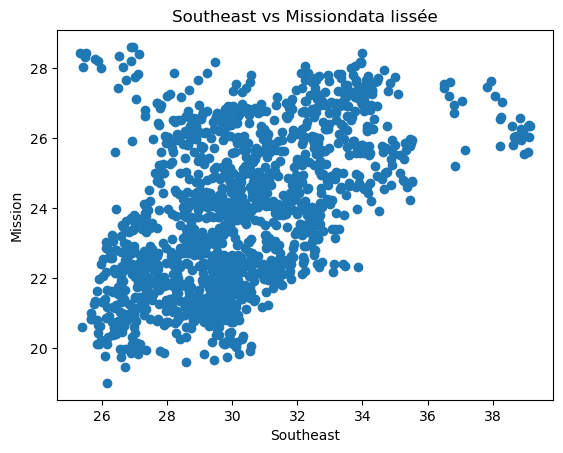

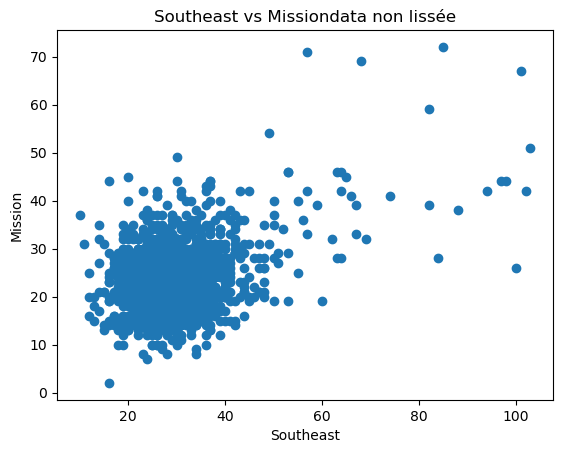

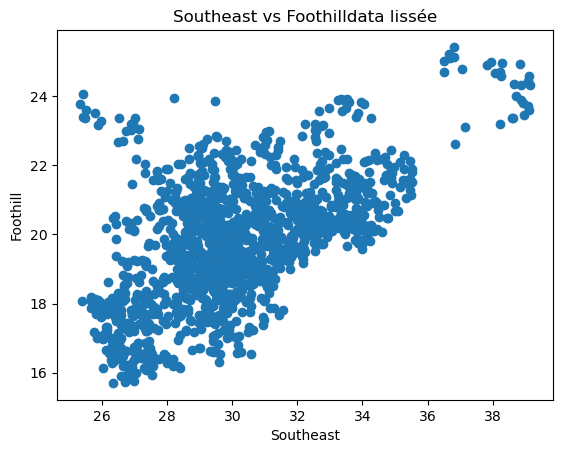

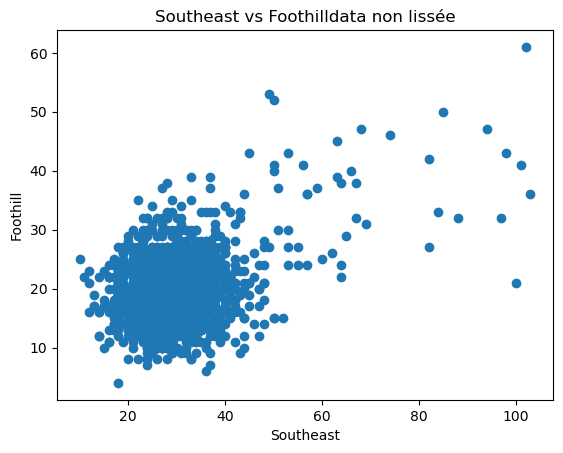

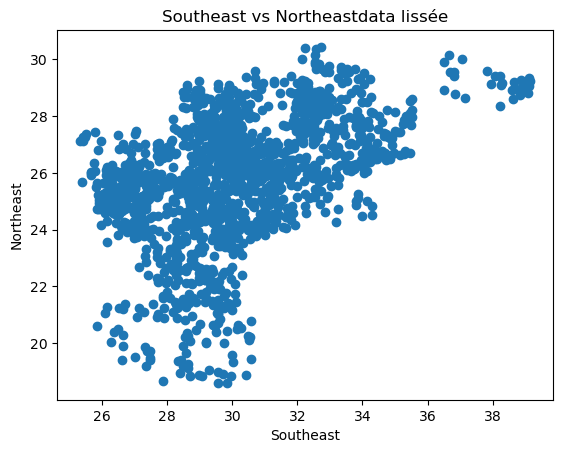

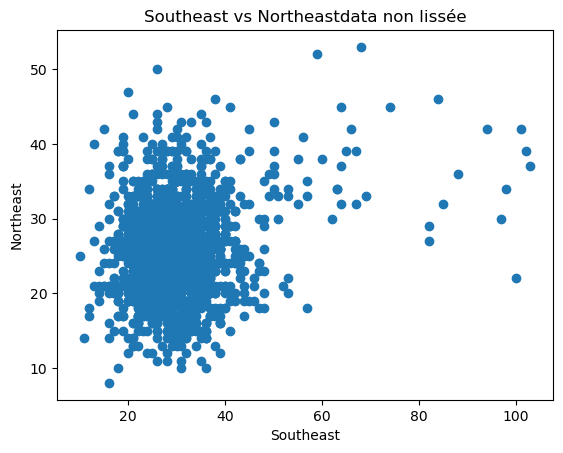

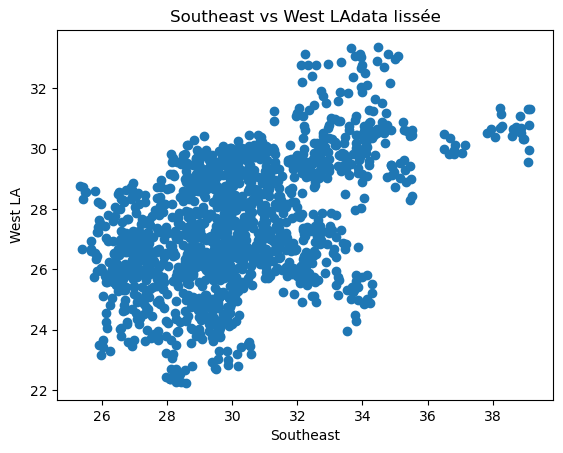

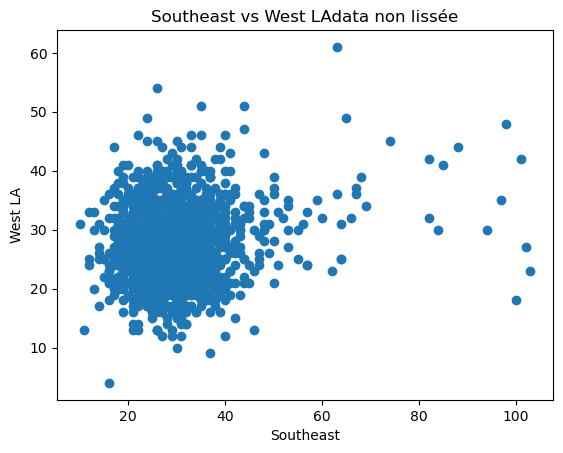

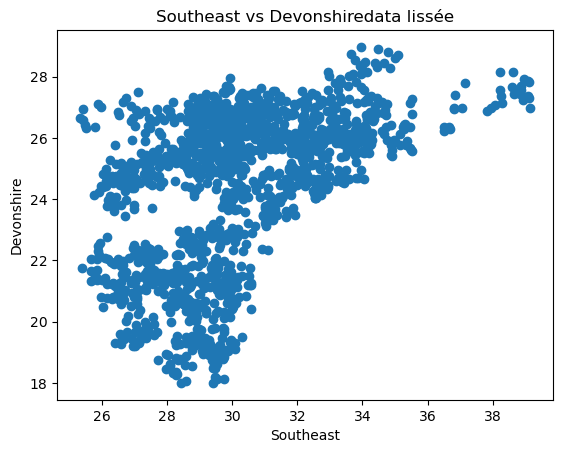

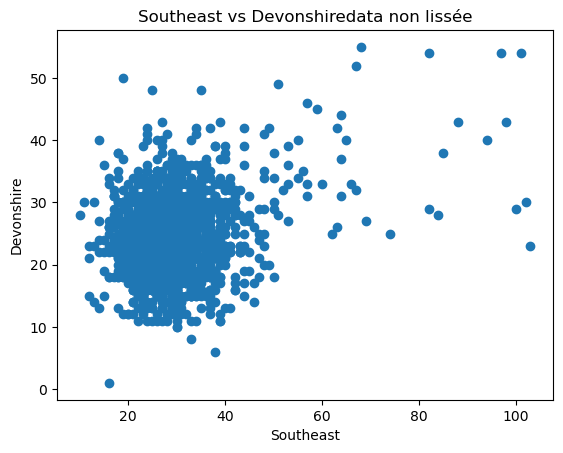

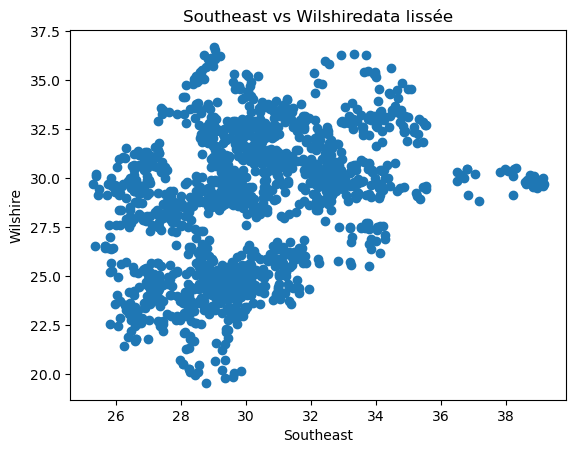

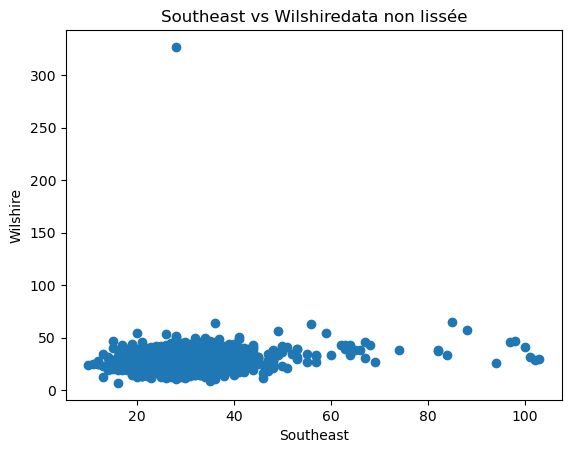

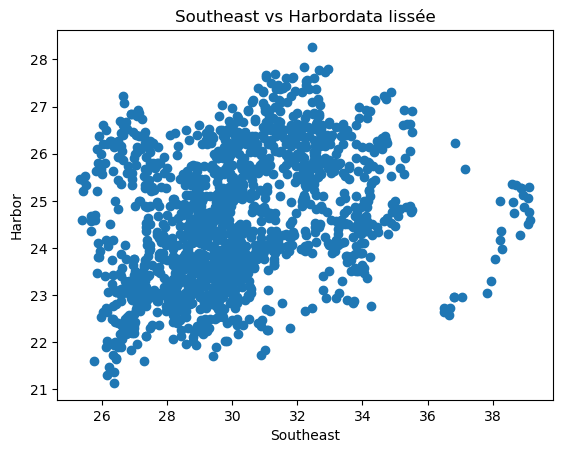

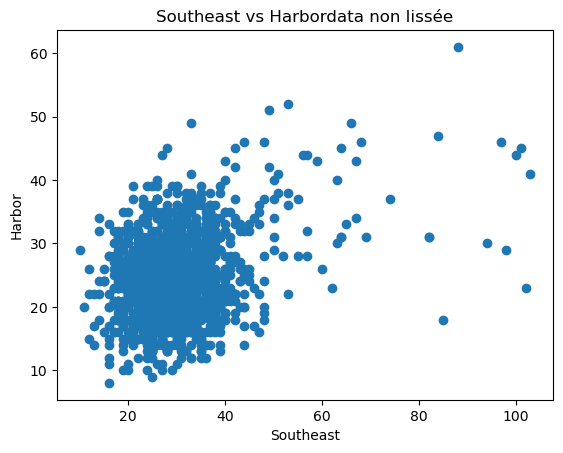

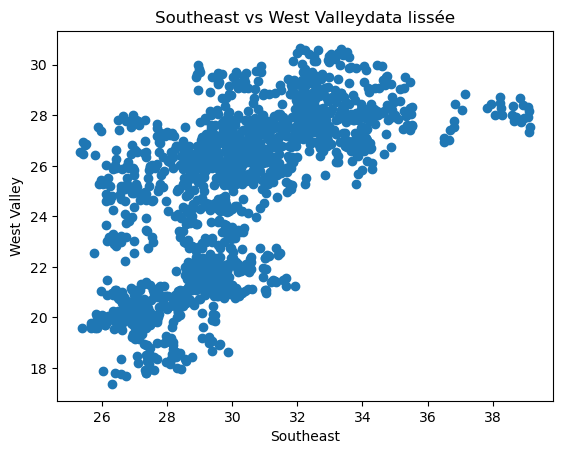

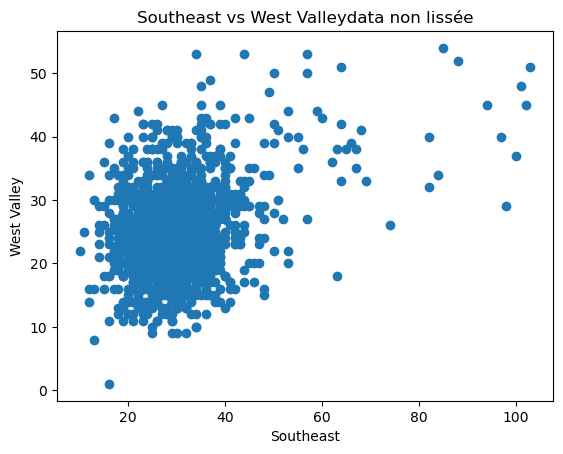

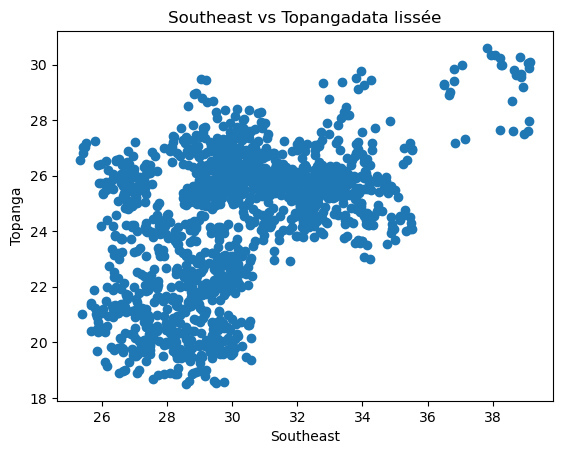

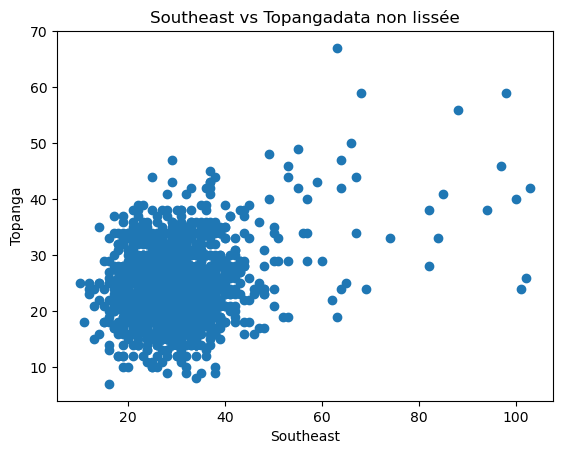

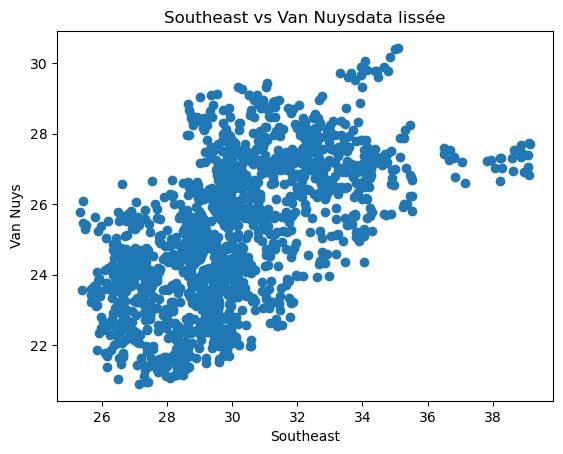

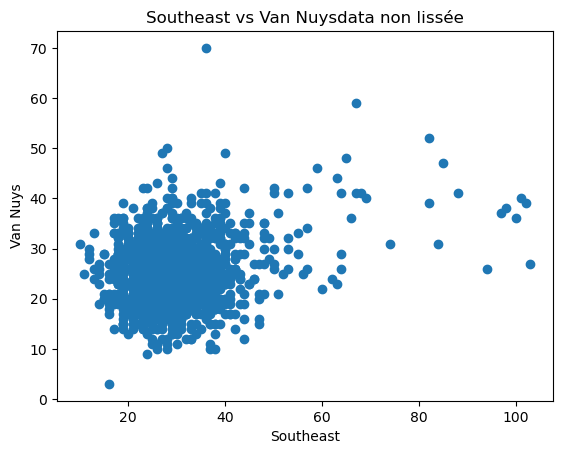

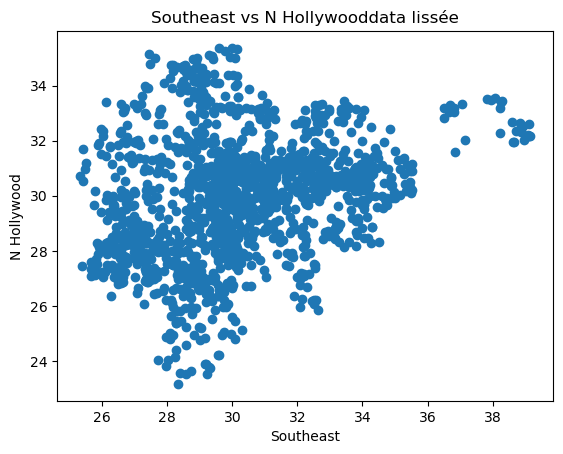

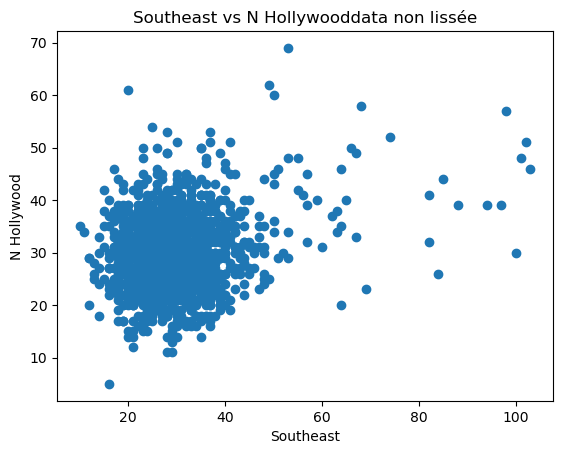

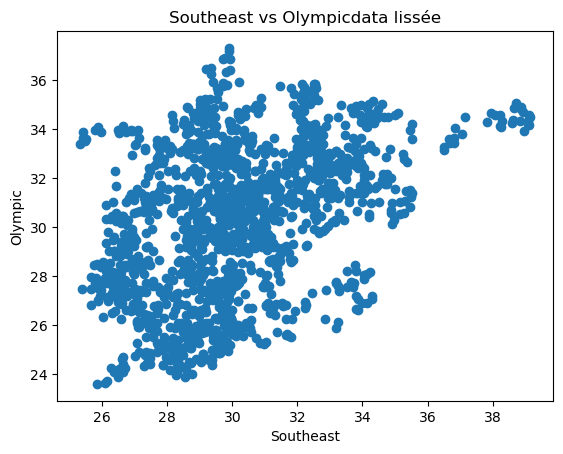

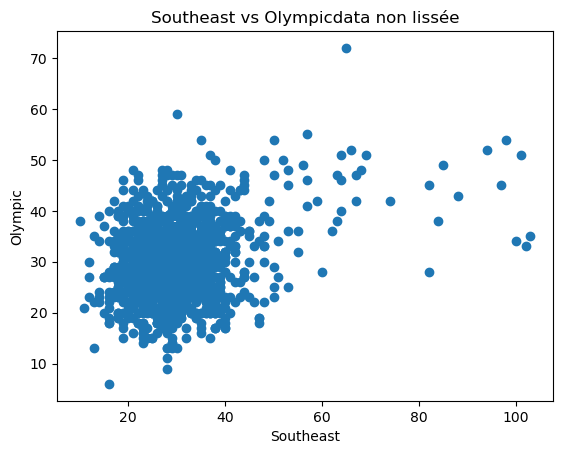

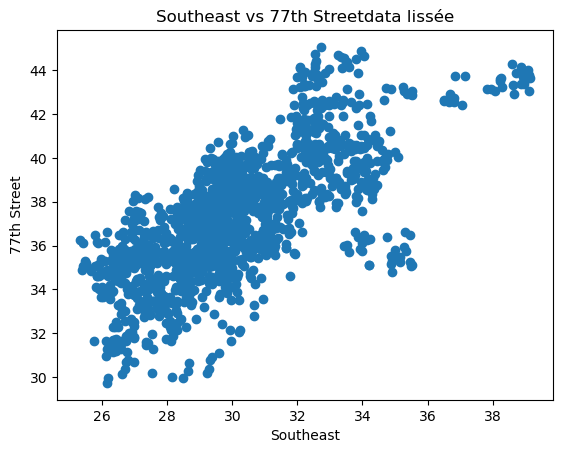

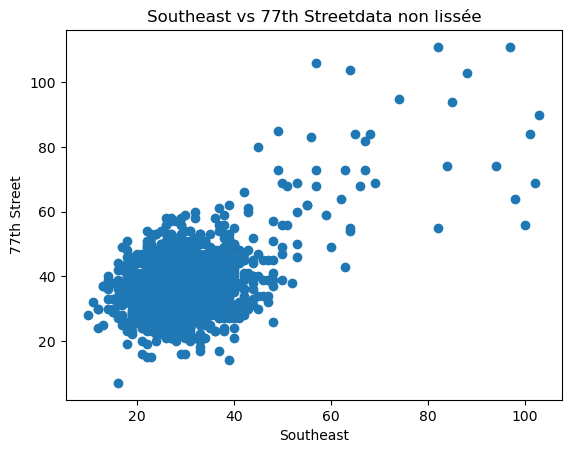

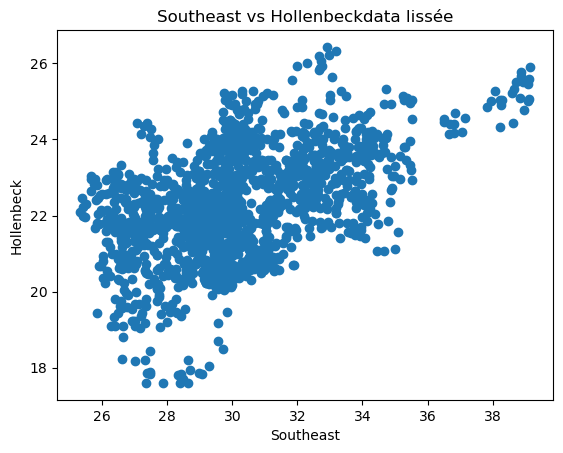

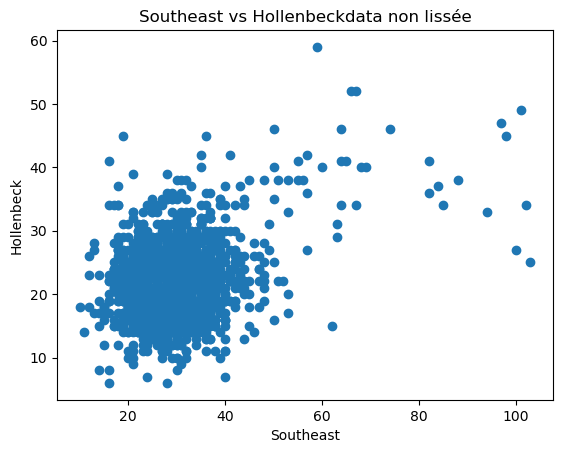

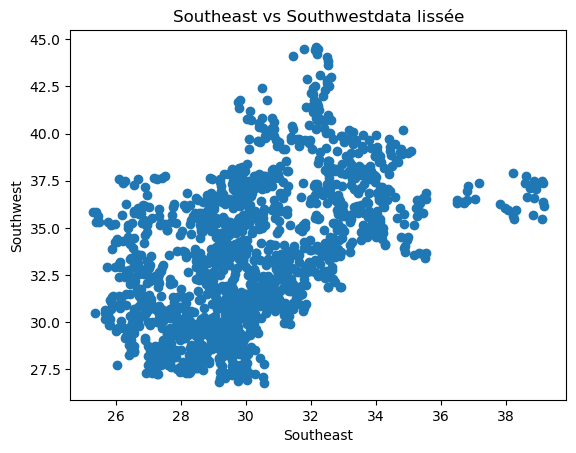

KeyboardInterrupt: 

In [ ]:
for place1 in data_rolled.columns: 
    if place1 != 'dates': 
        for place2 in data_rolled.columns: 
            if place2 != 'dates' and place1 != place2  : 
                x=data_rolled[place1]
                y=data_rolled[place2]
                plt.plot(x,y, 'o')
                plt.title(place1 + ' vs ' + place2 + 'data lissée')
                plt.xlabel(place1)
                plt.ylabel(place2)
                plt.show()
                x=data[place1]
                y=data[place2]
                plt.plot(x,y, 'o')
                plt.title(place1 + ' vs ' + place2+ 'data non lissée')
                plt.xlabel(place1)
                plt.ylabel(place2)
                plt.show()



In [ ]:


liste2=df2['DATE OCC'].tolist()
liste2.sort()

liste_triee2=sort_dates(liste2)


dico2=dict()
for date in liste_triee2: 
    dico2[date[:10]]=0
for date in liste_triee2:
    dico2[date[:10]]+=1

dates_crime2=list(dico2.keys())
nombre_crimes2=list(dico2.values())
dates_crime2=[datetime.strptime(date, '%m/%d/%Y') for date in dates_crime2]


In [ ]:
dates_crime2=[datetime.strptime(date, '%m/%d/%Y') for date in dates_crime2]


[datetime.datetime(2020, 1, 1, 0, 0),
 datetime.datetime(2020, 1, 2, 0, 0),
 datetime.datetime(2020, 1, 3, 0, 0),
 datetime.datetime(2020, 1, 4, 0, 0),
 datetime.datetime(2020, 1, 5, 0, 0),
 datetime.datetime(2020, 1, 6, 0, 0),
 datetime.datetime(2020, 1, 7, 0, 0),
 datetime.datetime(2020, 1, 8, 0, 0),
 datetime.datetime(2020, 1, 9, 0, 0),
 datetime.datetime(2020, 1, 10, 0, 0),
 datetime.datetime(2020, 1, 11, 0, 0),
 datetime.datetime(2020, 1, 12, 0, 0),
 datetime.datetime(2020, 1, 13, 0, 0),
 datetime.datetime(2020, 1, 14, 0, 0),
 datetime.datetime(2020, 1, 15, 0, 0),
 datetime.datetime(2020, 1, 16, 0, 0),
 datetime.datetime(2020, 1, 17, 0, 0),
 datetime.datetime(2020, 1, 18, 0, 0),
 datetime.datetime(2020, 1, 19, 0, 0),
 datetime.datetime(2020, 1, 20, 0, 0),
 datetime.datetime(2020, 1, 21, 0, 0),
 datetime.datetime(2020, 1, 22, 0, 0),
 datetime.datetime(2020, 1, 23, 0, 0),
 datetime.datetime(2020, 1, 24, 0, 0),
 datetime.datetime(2020, 1, 25, 0, 0),
 datetime.datetime(2020, 1, 26, 0,

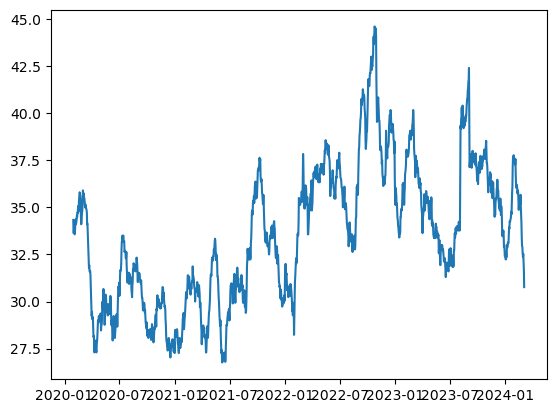

In [ ]:
plt.plot(dates_crime2 , pd.Series(nombre_crimes2).rolling(window=30).mean())